# Anomaly detection

## Problem Motivation

### Anomaly detection example

Aircraft engine features:<br>
$x_1$ = heat generated<br>
$x_2$ = vibration intensity<br>
...

### Density estimation

Dataset: {$x^{(1)}, x^{(2)}, ..., x^{(m)}$}<br>
Is $x_{test}$ anomalous

### Anomaly detection example

Fraud detection:<br>
$\rightarrow$$x^{(i)}$ = feature of user $i's$ activates<br>
$\rightarrow$Model $p(x)$ from date.<br>
$\rightarrow$Identify unusual users by checking which have $p(x) < \epsilon$

Manufacturing:<br>
$\rightarrow$$x^{(i)}$ = features of machine $i$<br>
$x_1$ = memory use, $x_2$ = number of disk accesses/sec,
$x_3$ = CPU load, $x_4$ = CPU load/network traffic, $x_n$...<br>
$\rightarrow$$p(x) < \epsilon$


## Gaussian Distribution

### Gaussian (Normal) distribution

Say $x \in \mathbb{R}$. If $x$ is a distributed Gaussian with mean $\mu$, variance $\sigma^2$<br>
$\rightarrow$$x~\mathcal{N}(\mu, \sigma^2)$

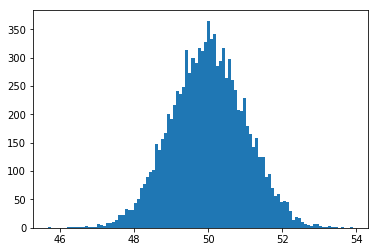

In [84]:
import matplotlib.pyplot as plt
import numpy as np

mu = 50
sigma = 10
N = 10000
x = np.random.normal(mu, sigma, N)
plt.hist(x, bins=100)
plt.show()

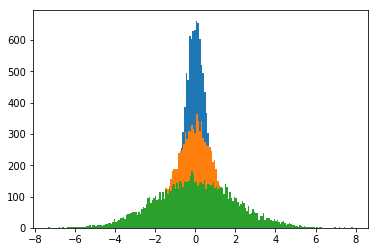

In [83]:
mu = 0
sigma = [0.5, 1, 2]
N = 10000
x1 = np.random.normal(mu, sigma[0], N)
x2 = np.random.normal(mu, sigma[1], N)
x3 = np.random.normal(mu, sigma[2], N)

fig, ax = plt.subplots()

ax.hist(x1, bins=int(100 * sigma[0]))
ax.hist(x2, bins=int(100 * sigma[1]))
ax.hist(x3, bins=int(100 * sigma[2]))

plt.show()

## Algotirhm

### Density estimation

Training set: {$x^{(1)}, ..., x^{(m)}$}<br>
Each example is $x \in \mathbb{R}$

$p(x) \\
= p(x_1; \mu_1, \sigma^2_1)p(x_2; \mu_2, \sigma^2_2)p(x_3; \mu_3, \sigma^2_3)...p(x_n; \mu_n, \sigma^2_n)\\
= \Pi^n_{j=1}p(x_j; \mu_j, \sigma^2_j)
$

***<br>
$\sum_{i=1}^ni = 1 + 2 + 3 + ... + n$<br>
$\Pi_{i=1}^ni = 1 \times 2 \times 3 \times .... \times n$<br>

### Anomaly detection algorithm

1. Choose features $x_i$ that you think might be indicative of anomalous examples.
2. Fit parameters $\mu_1, ..., \mu_n, \sigma_1^2, ..., \sigma_n^2$<br>
    $\mu_j = \frac{1}{m}\sum_{i=1}^mx_j^{(i)}$<br>
    $\sigma_j^2 = \frac{1}{m}\sum_{i=1}^m(x_j^{(i)} - \mu_j)^2$
3. Given new example $x$, compute $p(x)$:<br>
    $p(x) = \Pi_{j=1}^np(x_j; \mu_j, \sigma_j^2) = \Pi_{j=1}^n\frac{1}{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$<br>
    Anomaly if $p(x) < \epsilon$

## Developing and Evaluating an Anomaly Detection System

### The importance of real-number evaliation

When developing a learning algorithm (choosing features, etc), making decisions is much easier if we have a way of evaluating our learning algoritm.<br>
Assume we have some labeled data, of anomalous an non-anomalous examples. (y = 0 if normal, y = 1 if anomalous).<br>
Training set: $x^{(1)}, x^{(2)}, ..., x^{(m)}$ (assume normal example/not anomalous)<br>
Cross validation set: $(x_{cv}^{(1)}, y_{cv}^{(1)}), ..., (x_{cv}^{(m_{cv})}, y_{cv}^{(m_{cv})})$<br>
Test set: $(x_{test}^{(1)}, y_{test}^{(1)}), ..., (x_{test}^{(m_{test})}, y_{test}^{(m_{test})})$

### Aircraft engins motivationg example

10000 good(normal) engines<br>
20 frawed engines(anomalous)

Training set: 6000 good engines (y = 0)<br>
CV: 2000 good engines (y = 0), 10 anomalous (y = 1)<br>
Test: 2000 good engines (y = 0), 10 anomalous(y = 1)

Alternatice: (bad not reccomend):<br>
Training set: 6000 good engines<br>
CV: 4000 good engines (y = 0), 10 anomalous (y = 1)<br>
Test: 4000 good engines (y = 0), 10 anomalous (y = 1)

### Algorithm evaluation

FIt model $p(x)$ on training set {$x^{(1)}, ..., x^{(m)}$}<br>
On a cross validation/test example $x$ predict<br>
$y = \bigl\{
\begin{array}\\
1\;\;\;\verb| if | p(x) < \epsilon\verb| anomaly |\\
0\;\;\;\verb| if | p(x) \geq \epsilon\verb| normal |\\
\end{array}$

Possible evaluation metrcs: <br>
- True positive, false positive, false negative, true negative
- Predict/Recall
- $F_1-score$

can also use cross validatoin set to choose parameter $\epsilon$

### Anomaly Detection vs. Supervised Learning

<b><u>Anomaly detection:</u></b><br>
- very small number of positive example (y = 1). (0-20 is common)
- Large number of nagative (y = 0) example
- Many different "types" of anomalies. Hard for any algorithm to learn from positive examples what the anomalies look like;
- future anomalies may look nothing like any of the anomalous example we've seen so far

<b><u>Supervised learning:</u></b><br>
- Large number of positive and negative example
- Enough positive example for algorithm to get sense of what positive exaple likely to be similer to ones in training set.

## Choosing What Features to Use

### Non-gaussian features

to convert faussian (ex. using $log(x + c), \sqrt{x}, x^{t}$)

### Error analysis for anomaly detection

Want $p(x)$ large for normal example $x$.<br>
$p(x)$ small for anomalous examples $x$.

Most common problem:<br>
$p(x)$ is comparable (say, both large) for noemal and anomalous examples

### Monitoring coputers in a data center

Choosing features that might take on unusually large or small values in the event of an anomaly.<br>
$x_1$ = memory use of computer<br>
$x_2$ = number of disk accesses/sec<br>
$x_3$ = CPU load<br>
$x_4$ = network traffic<br>
$x_5$ = [createfeature] $\frac{\verb| CPU load |}{\verb| network traffic |}$<br>
$x_6$ = [createfeature] $\frac{(\verb| CPU load |)^2}{\verb| network traffic |}$



## Multivariate Gaussian Distribution

### Multivariate Gaussian (Normal) distribution

$x \in \mathbb{R}$. Don't model $p(x_1), p(x_2), ..., $ etc. separately.<br>
Model $p(x)$ all in one go.<br>
Parameters: $\mu \in \mathbb{R}^n, \Sigma \in \mathbb{R}^{n \times n}$ (covariance matrix)

Parameters $\mu, \Sigma$<br>
$p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{\frac{\pi}{2}}|\Sigma|^{\frac{1}{2}}}exp\biggl(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\biggr)$

## Anomaly Detection using the Multivariate Gaussian Distribution

Parameters $\mu, \Sigma$<br>
$p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{\frac{\pi}{2}}|\Sigma|^{\frac{1}{2}}}exp\biggl(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\biggr)$

Paeameter fitting:<br>
Given training set {$x^{(1)}, x^{(2)}, ..., x^{(m)}$}<br>
$\mu = \frac{1}{m}\sum_{i=1}^mx^{(i)}$<br>
$\Sigma = \frac{1}{m}\sum_{i = 1}^m(x^{(i)} - \mu)(x^{(i)} - \mu)^T$

### Anomaly detection with the multivariate Gaussian

1.Fit model $p(x)$ by setting<br>
$\mu = \frac{1}{m}\sum_{i=1}^mx^{(i)}$<br>
$\Sigma = \frac{1}{m}\sum_{i = 1}^m(x^{(i)} - \mu)(x^{(i)} - \mu)^T$

2.Given a new example $x$, compute<br>
$p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{\frac{\pi}{2}}|\Sigma|^{\frac{1}{2}}}exp\biggl(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\biggr)$

Flag an anomaly if $p(x) < \epsilon$

### Relationship to original model

Original model: $p(x) = p(x_1; \mu_1, \sigma_1^2) \times p(x_2; \mu_2, \sigma_2^2) \times ... \times p(x_n; \mu_n, \sigma_n^2)$
Multivariate Gaussian: $p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{\frac{\pi}{2}}|\Sigma|^{\frac{1}{2}}}exp\biggl(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\biggr)$

### Original model vs Multivariate Gaussian

<b><u>Original model</u></b>
- Manually create features to capture anomalies where $x_1, x_2$ take unusual combinations of values
- Computatinoally cheaper (alternatively, scales better to large n)<br> n = 10,000,  n = 100,000
- OK even if $m$ (tainining set size) is small

<b><u>Multivariate Gaussian</u></b>
- Automatically captures correlations between features
- Computationally more expensive
- Must have $m > n$, or else $\Sigma$ is non-invertible <br>
$m \geq 10n$

## Test

<b><u>Question1</u></b><br>
For which of the following problems would anomaly detection be a suitable algorithm?
- Given data from credit card transactions, classify each transaction according to type of purchase (for example: food, transportation, clothing).
- From a large set of primary care patient records, identify individuals who might have unusual health conditions.
- In a computer chip fabrication plant, identify microchips that might be defective.
- From a large set of hospital patient records, predict which patients have a particular disease (say, the flu).

<b><u>Question2</u></b><br>
Suppose you have trained an anomaly detection system for fraud detection, and your system that flags anomalies when p(x)p(x) is less than \varepsilonε, and you find on the cross-validation set that it mis-flagging far too many good transactions as fradulent. What should you do?
- Increase $\epsilon$
- Decrease $\epsilon$

<b><u>Question3</u></b><br>
Suppose you are developing an anomaly detection system to catch manufacturing defects in airplane engines. You model uses<br>
$p(x) = \Pi^n_{j=1}p(x_j; \mu_j, \sigma^2_j)$<br>
You have two features $x_1$ = vibration intensity, and $x_2$ = heat generated. Both $x_1$ and $x_2$ take on values between 0 and 1 (and are strictly greater than 0), and for most "normal" engines you expect that $x_1 \approx x_2$. One of the suspected anomalies is that a flawed engine may vibrate very intensely even without generating much heat (large $x_1$, small $x_2$), even though the particular values of $x_1$ and $x_2$ may not fall outside their typical ranges of values. What additional feature $x_3$ should you create to capture these types of anomalies:
- $x_3 = x_1 \times x_2$
- $x_3 = x_1 + x_2$
- $x_3 = \frac{x_1}{x_2}$
- $x_3 = x_1^2 \times x_2$

<b><u>Question4</u></b><br>
Which of the following are true? Check all that apply.
- When choosing features for an anomaly detection system, it is a good idea to look for features that take on unusually large or small values for (mainly the) anomalous examples.
- If you are developing an anomaly detection system, there is no way to make use of labeled data to improve your system.
- If you do not have any labeled data (or if all your data has label $y=0$), then is is still possible to learn $p(x)$, but it may be harder to evaluate the system or choose a good value of $\epsilon$.
- If you have a large labeled training set with many positive examples and many negative examples, the anomaly detection algorithm will likely perform just as well as a supervised learning algorithm such as an SVM.

<b><u>Question5</u></b><br>
You have a 1-D dataset $\{x^{(1)}, \ldots, x^{(m)}$
 } and you want to detect outliers in the dataset. You first plot the dataset and it looks like this:

[graph]

Suppose you fit the gaussian distribution parameters $\mu_1$ and $\sigma_1^2$ to this dataset. Which of the following values for $\mu_1$ and $\sigma_1^2$ might you get?
- $\mu=−3, \sigma_1^2 = 4$
- $\mu=−6, \sigma_1^2 = 4$
- $\mu=−3, \sigma_1^2 = 2$
- $\mu=−6, \sigma_1^2 = 2$


<hr>

# Recommender System

## Problem Fomulation

### Example: Predictiong motive ratings

User rate movies using <s>one</s> <font color="red">zero</font> to five stars

|type|Movie|Alice(1)|Bob(2)|Carol(3)|Dave(4)|
|:-----:|:-----:|:---------:|:--------:|:---------:|:---------:|
|love|Love at last|5|5|0|0|
|love|Romance forever|5|?|?|0|
|love|Cute pupplies of love|?|4|0|?|
|action|Nonstop car chase|0|0|5|4|
|action|Sword vs. karate|0|0|5|?|

$n_u$ = no.users<br>
$n_m$ = no.movies<br>
$r(i, j)$ = 1 if user $j$ has rated movie $i$<br>
$y^{(i, j)}$ = rating given by user $j$ to movie $i$ (defined only if $r(i, j) = 1$)

## Content Based Reccomendations



### Contetnt-based recommender system


|type|Movie|Alice(1)|Bob(2)|Carol(3)|Dave(4)|$x_1$<br>(romance)|$x_2$<br>(action)|
|:-----:|:-----:|:---------:|:--------:|:---------:|:---------:|:-------:|:-------:|
|romance|Love at last|5|5|0|0|0.9|0|
|romance|Romance forever|5|?|?|0|1.0|0.01|^{(1)}
|romance|Cute pupplies of love|?|4|0|?|0.99|0|
|action|Nonstop car chase|0|0|5|4|0.1|1.0|
|action|Sword vs. karate|0|0|5|?|0|0.9|

$n_u = 4, n_m = 5, x_0 = 1$<br>
$x^{(1)} = \begin{bmatrix}
1\\0.9\\0
\end{bmatrix}$
$x^{(2)} = \begin{bmatrix}
1\\1.0\\0.01
\end{bmatrix}$
$x^{(3)} = ...$

For each user $j$, learn a parameter $\theta^{(i)} \in \mathbb{R}^3$. Predict user $j$ as rating move $i$ with $(\theta^{(i)})^Tx^{(i)}$ stars.

$x^{(3)} = \begin{bmatrix}
1\\0.99\\0
\end{bmatrix}$
$\theta^{(1)} = \begin{bmatrix}
0\\5\\0
\end{bmatrix}$<br>
$(\theta^{(1)})^Tx^{(3)} = \int x0.99 = 4.95$

### Problem formulation

$r(i, j) = 1$ if user $j$ has rated movie $i$ (0 otherwise)<br>
$r^{(o, j)}$ = rating by user $j$ on movie $i$ (If defined)

$\theta^{(j)}$ = parameter vector for user $i$<br>
$x^{(i)}$ = feature vector for movie $i$<br>
For user $j$, movie $i$, predited rating: $(\theta^{(j)})^T(x^{(i)})$<br>

$m^{(j)}$ = no. of movies rated by user $j$<br>
To leatn $\theta^{(j)}$:<br>
$min_{\theta^{(j)}}\frac{1}{2m^{(j)}}\Sigma_{i:r(i,j) = 1}\biggl((\theta^{(j))^T(x^{(i)})} - y^{(i, j)}\biggr)^2 + \frac{\lambda}{2m^{(j)}}\sum_{k = 1}^n(\theta_k^{j})^2$

### Optimization objective:
To learn $\theta^{(j)}$ (parameter for user $j$):<br>
$min_{\theta^{(j)}}\frac{1}{2}\sum_{i:r(i,j) = 1}\biggl((\theta^{(j))^T(x^{(i)})} - y^{(i, j)}\biggr)^2 + \frac{\lambda}{2}\sum_{k = 1}^n(\theta_k^{j})^2$

To learn $\theta^{(1)}, \theta^{(2)}, ..., \theta^{(n_u)}$:<br>
$min_\theta^{(1)}, ..., \theta^(n_u)\frac{1}{2}\sum_{j=1}^{n_u}\sum_{i:r(i, j)=1} + \frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^n(\theta_k^{(j)})^2$

### Opatimiaztion algorithm:
$min_\theta^{(1)}, ..., \theta^(n_u)\frac{1}{2}\sum_{j=1}^{n_u}\sum_{i:r(i, j)=1} + \frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^n(\theta_k^{(j)})^2$

Gradient discent update:<br>
$\theta_k^{(j)} := \theta_k^{(j)} - \alpha \sum_{i:r(i, j) = 1} ((\theta^{(j)})^Tx^{(i)} - y^{(i, j)})x_k^{(i)}$ (for k = 0) <br>
$\theta_k^{(j)} := \theta_k^{(j)} - \alpha\biggl(\sum_{i:r(i, j) = 1} ((\theta^{(j)})^Tx^{(i)} - y^{(i, j)})x_k^{(i)} + \lambda\theta_j^{(j)}\biggr)$ (for k ≠ 0)

## Collaborative Filtering

### Problem motivation

|type|Movie|Alice(1)|Bob(2)|Carol(3)|Dave(4)|$x_1$<br>(romance)|$x_2$<br>(action)|
|:-----:|:-----:|:---------:|:--------:|:---------:|:---------:|:-------:|:-------:|
|romance|Love at last|5|5|0|0|?|?|
|romance|Romance forever|5|?|?|0|?|?|
|romance|Cute pupplies of love|?|4|0|?|?|?|
|action|Nonstop car chase|0|0|5|4|?|?|
|action|Sword vs. karate|0|0|5|?|?|?|

$\theta^{(1)} = \begin{bmatrix}0\\5\\0\end{bmatrix}$
$\theta^{(2)} = \begin{bmatrix}0\\5\\0\end{bmatrix}$
$\theta^{(3)} = \begin{bmatrix}0\\0\\5\end{bmatrix}$
$\theta^{(4)} = \begin{bmatrix}0\\0\\5\end{bmatrix}$

### Optimization algorithm

Given $\theta^{(1)}, ..., \theta^{n_u}$, to learn $x^{(i)}$<br>
$\rightarrow min_{x^{(i)}}\frac{1}{2}\sum_{j:r(i, j) = 1}((\theta^{(j)})^Tx^{(i)} - y^{(i, j)})^2 + \frac{\lambda}{2}\sum_{k=1}^n(x_k^{(i)})^2$

Given $\theta^{(1)}, ..., \theta^{(n_u)}$, to learn $x^{(1)}, ..., x^{(n_m)}$:<br>
$\rightarrow min_{x^{(1)}, ..., x^{n_m}}\frac{1}{2}\sum_{i=1}^{n_m}\sum_{j:r(i, j)=1}((\theta)^Tx^{(i) - y^{(i, j)}})^2 + \frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k = 1}^n(x_k^{(i)})^2$

### Collaborative filtering

Given $x^{(1)}, ..., x^{n_m}$ (and movie ratings),<br>
can estimate $\theta^{(1), ..., \theta^{(n_u)}}$

Given $\theta^{(1), ..., \theta^{(n_u)}}$ (and movie ratings),<br>
can estimate $x^{(1)}, ..., x^{n_m}$

## Collaborative Filtering Algorithm

1. Initialize $x^(1), ..., x^{(n)}, \theta^{(1)}, ..., \theta^{(n_m)}$ to small random values.
2. Minimize $J(x^(1), ..., x^{(n)}, \theta^{(1)}, ..., \theta^{(n_m)})$ using gradient descent (or an advanced optimization algorithm). E.g. for every $j = 1, ..., n_m, i = 1, ..., n_m$:<br>
$x_k^{(i)} = x_k^{(i)} - \alpha\biggl(\sum_{j:r(i, j) = 1} ((\theta^{(j)})^Tx^{(i)} - y^{(i, j)})\theta_k^{(j)} + \lambda x_k^{(i)}\biggr)$ <br>
$\theta_k^{(i)} = \theta_k^{(i)} - \alpha\biggl(\sum_{j:r(i, j) = 1} ((\theta^{(j)})^Tx^{(i)} - y^{(i, j)})\theta_k^{(j)} + \lambda \theta_k^{(i)}\biggr)$ <br>
3. For a user with parameter $\theta$ and a movie with (learned) features $x$, predict a star rating of $\theta^Tx$

## Vectorization: Low Rank Matrix Factorization

### Collaborative filtering

$Y = \begin{bmatrix}
5&5&0&0\\
5&?&?&0\\
?&4&0&?\\
0&0&5&4\\
0&0&5&0
\end{bmatrix}$

Preadict ratings:<br>
$\begin{bmatrix}
(\theta^{(1)})^T(x^{(1)})&(\theta^{(2)})^T(x^{(1)})&\cdots&(\theta^{(n_u)})^T(x^{(1)})\\
(\theta^{(1)})^T(x^{(2)})&(\theta^{(2)})^T(x^{(2)})&\cdots&(\theta^{(n_u)})^T(x^{(2)})\\
\vdots&\vdots&\ddots&\vdots\\
(\theta^{(1)})^T(x^{(n_m)})&(\theta^{(2)})^T(x^{(n_m)})&\cdots&(\theta^{(n_u)})^T(x^{(n_m)})\\
\end{bmatrix}$

### Finding related movies

For each product $i$, we learn a feature vector $x^{(i)} \in \mathbb{R}$.

How to find movie $j$ related movie $i$?

 5 most similer movies to movie $i$:<br>
 FInd 5 movies $j$ with the smallest $||x^{(i)} - x^{(j)}||$

## Implementational Detail: Mean Normalization

### Mean Normalization:

$Y = \begin{bmatrix}
5&5&0&0&?\\
5&?&?&0&?\\
?&4&0&?&?\\
0&0&5&4&?\\
0&0&5&0&?
\end{bmatrix}$
$\mu = \begin{bmatrix}
2.5\\
2.5\\
2\\
2.25\\
1.25
\end{bmatrix}$
$Y = \begin{bmatrix}
2.5&2.5&-2.5&-2.5&?\\
2.5&?&?&-2.5&?\\
?&2&-2&?&?\\
-2.25&-2.25&2.75&1.75&?\\
-1.25&-1.25&3.75&-1.25&?
\end{bmatrix}$

For user $j$, on movie $i$ predict:<br>
$\rightarrow (\theta^{(j)})^T(x^{(i)}) + \mu_i$

User 5(Eve) = $\begin{bmatrix}0\\0\end{bmatrix}$<br>
$(\theta^{(s)})^T(x^{(i)}) + \mu_i$

## Test

<b><u>Question1:</u></b><br>
Suppose you run a bookstore, and have ratings (1 to 5 stars) of books. Your collaborative filtering algorithm has learned a parameter vector $\theta^{(j)}$ for user $j$, and a feature vector $x^{(i)}x$ for each book. You would like to compute the "training error", meaning the average squared error of your system's predictions on all the ratings that you have gotten from your users. Which of these are correct ways of doing so (check all that apply)? For this problem, let $m$ be the total number of ratings you  have gotten from your users. (Another way of saying this is that 


<b><u>Question2:</u></b><br>
In which of the following situations will a collaborative filtering system be the most appropriate learning algorithm (compared to linear or logistic regression)?
- You run an online bookstore and collect the ratings of many users. You want to use this to identify what books are "similar" to each other (i.e., if one user likes a certain book, what are other books that she might also like?)
- You're an artist and hand-paint portraits for your clients. Each client gets a different portrait (of themselves) and gives you 1-5 star rating feedback, and each client purchases at most 1 portrait. You'd like to predict what rating your next customer will give you.
- You own a clothing store that sells many styles and brands of jeans. You have collected reviews of the different styles and brands from frequent shoppers, and you want to use these reviews to offer those shoppers discounts on the jeans you think they are most likely to purchase
- You manage an online bookstore and you have the book ratings from many users. You want to learn to predict the expected sales volume (number of books sold) as a function of the average rating of a book.

<b><u>Question3:</u></b><br>
You run a movie empire, and want to build a movie recommendation system based on collaborative filtering. There were three popular review websites (which we'll call A, B and C) which users to go to rate movies, and you have just acquired all three companies that run these websites. You'd like to merge the three companies' datasets together to build a single/unified system. On website A, users rank a movie as having 1 through 5 stars. On website B, users rank on a scale of 1 - 10, and decimal values (e.g., 7.5) are allowed. On website C, the ratings are from 1 to 100. You also have enough information to identify users/movies on one website with users/movies on a different website. Which of the following statements is true?
- You can merge the three datasets into one, but you should first normalize each dataset's ratings (say rescale each dataset's ratings to a 1-100 range).
- It is not possible to combine these websites' data. You must build three separate recommendation systems.
- You can combine all three training sets into one without any modification and expect high performance from a recommendation system.
- Assuming that there is at least one movie/user in one database that doesn't also appear in a second database, there is no sound way to merge the datasets, because of the missing data.

<b><u>Question4:</u></b><br>
Which of the following are true of collaborative filtering systems? Check all that apply.
- Even if each user has rated only a small fraction of all of your products (so $r(i,j)=0$ for the vast majority of $(i,j)$ pairs), you can still build a recommender system by using collaborative filtering.
- Suppose you are writing a recommender system to predict a user's book preferences. In order to build such a system, you need that user to rate all the other books in your training set.
- For collaborative filtering, it is possible to use one of the advanced optimization algoirthms (L-BFGS/conjugate gradient/etc.) to solve for both the $x^{(i)}$'s and $\theta^{(j)}$ 's simultaneously.
- For collaborative filtering, the optimization algorithm you should use is gradient descent. In particular, you cannot use more advanced optimization algorithms (L-BFGS/conjugate gradient/etc.) for collaborative filtering, since you have to solve for both the $x^{(i)}$'s and $\theta^{(j)}$'s simultaneously.

<b><u>Question5:</u></b><br>